In [65]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import cmocean

In [66]:
rootdir = '/local/projects/so_decadal_variability/'

files = glob.glob(rootdir+'flux/*_erai_1*.nc')
flux = xr.open_mfdataset(files)
files = glob.glob(rootdir+'ocean/*_en4_1*.nc')
ocean = xr.open_mfdataset(files)

In [67]:
select = {'time':slice('1998','2018')}
fluxnow = flux.sel(select).mean(['longitude','time'])
oceannow = ocean.sel(select).mean(['lon','time'])

### Hydrography

/home/aos/graemem/miniconda3/envs/so_idealized/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/graemem/miniconda3/envs/so_idealized/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/graemem/miniconda3/envs/so_idealized/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/graemem/miniconda3/envs/so_idealized/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


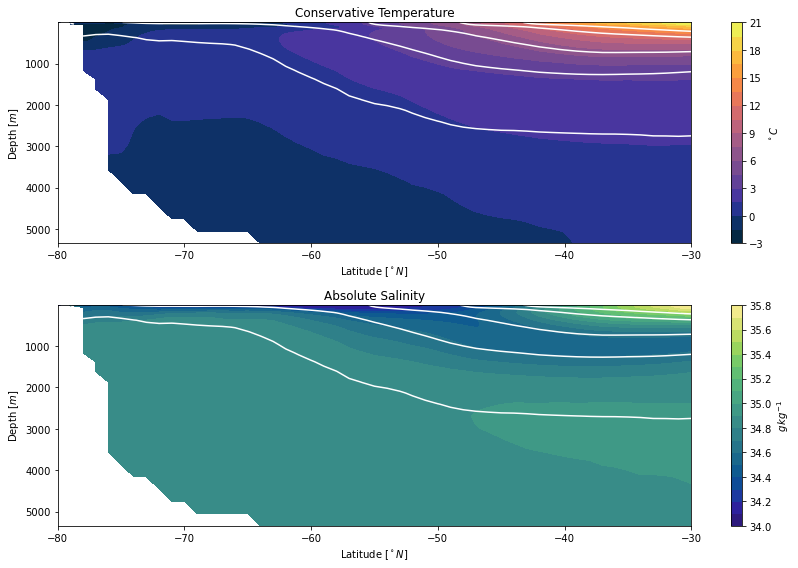

In [80]:
slevs = np.arange(26.2,28,0.4)
fig,(axT,axS) = plt.subplots(figsize=(12,8),nrows=2)

im = axT.contourf(oceannow['lat'],oceannow['depth'],oceannow['ct'],levels=20,cmap=cmocean.cm.thermal)
axT.contour(oceannow['lat'],oceannow['depth'],oceannow['sigma0'],levels=slevs,colors='w')
axT.invert_yaxis()
axT.set_xlim([-80,-30])
axT.set_xlabel('Latitude [$^\circ N$]')
axT.set_ylabel('Depth [$m$]')
axT.set_title('Conservative Temperature')
cb = plt.colorbar(im,ax=axT)
cb.set_label('$^\circ C$')

im = axS.contourf(oceannow['lat'],oceannow['depth'],oceannow['sa'],levels=20,cmap=cmocean.cm.haline)
axS.contour(oceannow['lat'],oceannow['depth'],oceannow['sigma0'],levels=slevs,colors='w')
axS.invert_yaxis()
axS.set_xlim([-80,-30])
axS.set_xlabel('Latitude [$^\circ N$]')
axS.set_ylabel('Depth [$m$]')
axS.set_title('Absolute Salinity')
cb = plt.colorbar(im,ax=axS)
cb.set_label('$g\,kg^{-1}$')

plt.tight_layout()

### Surface fluxes

/home/aos/graemem/miniconda3/envs/so_idealized/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/graemem/miniconda3/envs/so_idealized/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


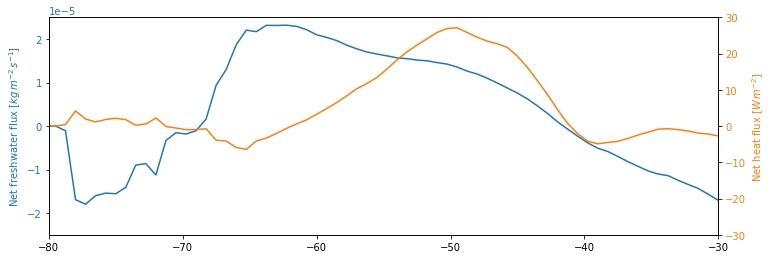

In [97]:
fig, ax = plt.subplots(figsize=(12,4))

color='tab:blue'
axQf = ax
axQf.plot(fluxnow['latitude'],fluxnow['fw'],color=color)
axQf.set_xlim([-80,-30])
axQf.set_ylim([-2.5E-5, 2.5E-5])
axQf.set_ylabel('Net freshwater flux [$kg\,m^{-2}\,s^{-1}$]',color=color)
axQf.tick_params(axis='y', labelcolor=color)

color='tab:orange'
axQh = ax.twinx()
axQh.plot(fluxnow['latitude'],fluxnow['ht']+fluxnow['sr'],color=color)
axQh.set_xlim([-80,-30])
axQh.set_ylim([-30, 30])
axQh.set_ylabel('Net heat flux [$W\,m^{-2}$]',color=color)
axQh.tick_params(axis='y', labelcolor=color)
